## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[521, 256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 1.2]

In [7]:
results = {}
"""
Build the experiment loop
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with MOMENTUM = {momentum}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-momentum-{momentum}"
    print(exp_name_tag)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

Experiment with MOMENTUM = 0.7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 521)               1601033   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               133632    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,768,851
Trainable params: 1,768,851
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 128us/step - loss: 2.0650 - acc: 0.2681 - val_loss: 1.9283 - val_acc: 0.3199
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.8815 - acc: 0.3406 - val_loss: 1.8407 - val_acc: 0.3561
Epoch 3/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.8101 - acc: 0.3668 - val_loss: 1.7792 - val_acc: 0.3781
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7603 - acc: 0.3856 - val_loss: 1.7426 - val_acc: 0.3857
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.7232 - acc: 0.3985 - val_loss: 1.7131 - val_acc: 0.4024
Epoch 6/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6909 - acc: 0.4098 - val_loss: 1.6776 - val_acc: 0.4114
Epoch 7/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.6619 - acc: 0.4217 - val_loss: 1.6543 - 

Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 127us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 140us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 145us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 134us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 129us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 130us/step - lo

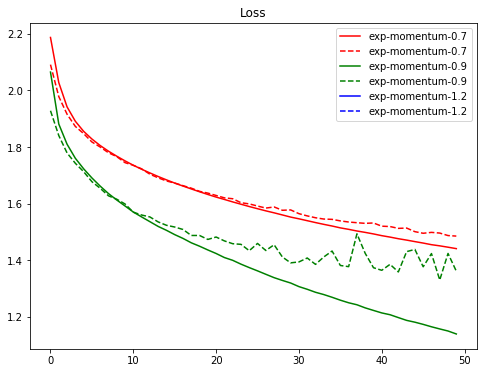

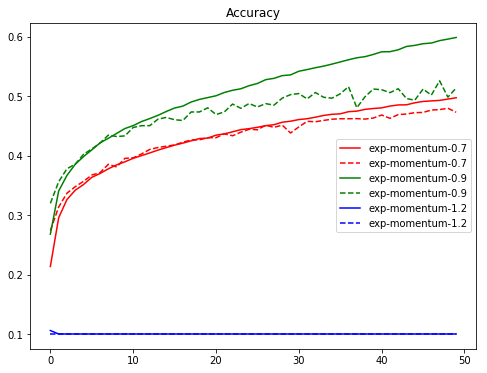

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Draw the results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
"""
Build the experiment loop
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"Experiment with MOMENTUM = {momentum}")
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = f"exp-momentum-{momentum}"
    print(exp_name_tag)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

Experiment with MOMENTUM = 0.7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 521)               1601033   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               133632    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,768,851
Trainable params: 1,768,851
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.0741 - acc: 0.2623 - val_loss: 1.9199 - val_acc: 0.3280
Epoch 2/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.8698 - acc: 0.3388 - val_loss: 1.8304 - val_acc: 0.3584
Epoch 3/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7994 - acc: 0.3643 - val_loss: 1.7705 - val_acc: 0.3815
Epoch 4/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.7505 - acc: 0.3816 - val_loss: 1.7273 - val_acc: 0.3930
Epoch 5/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7122 - acc: 0.3970 - val_loss: 1.6947 - val_acc: 0.4001
Epoch 6/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.6775 - acc: 0.4078 - val_loss: 1.6716 - val_acc: 0.4141
Epoch 7/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6478 - acc: 0.4206 - val_loss: 1.6396 - 

Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 127us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 124us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: nan - acc: 0.1000 - val_loss: nan - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - lo

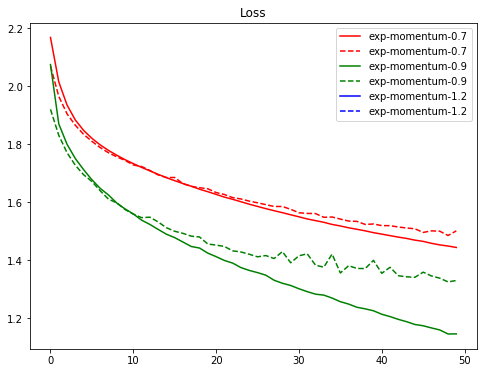

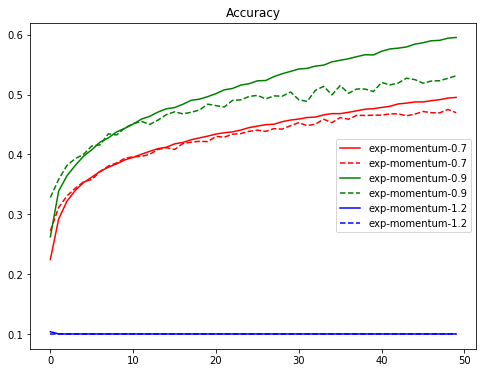

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Draw the results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()